## Sales Analysis

### Import Libraries

In [1]:
import pandas as pd
import os
import glob

### Read in updated dataframe

In [2]:
dataf=pd.read_csv("D:/1_DATA/Data Analysis Project/Sales Analysis/all_sales_data.csv")
dataf.head()
print(dataf.shape)

(186494, 6)


In [3]:
dataf.drop(dataf[dataf["Order ID"]=="Order ID"].index,inplace=True)
print(dataf.shape)

(186494, 6)


In [4]:
dataf.head()
print(dataf.shape)
dataf.to_csv("D:/1_DATA/Data Analysis Project/Sales Analysis/all_sales_data.csv", index=False)

(186494, 6)


In [5]:
df=pd.read_csv("D:/1_DATA/Data Analysis Project/Sales Analysis/all_sales_data.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [6]:
print(df.shape)

(186494, 6)


### Clean up empty rows

In [7]:
df.isnull().sum()

Order ID            544
Product             544
Quantity Ordered    544
Price Each          544
Order Date          544
Purchase Address    544
dtype: int64

In [8]:
df.dropna(thresh=6,inplace=True)

In [9]:
print(df.shape)

(185950, 6)


In [10]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### Augment data with additional column

#### Add month column

In [11]:
df.dtypes

Order ID            float64
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [12]:
#df["Month"]=3
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [13]:
df["Month"]=df["Order Date"].str[0:2]
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
2,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
5,176562.0,USB-C Charging Cable,1.0,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",04
6,176563.0,Bose SoundSport Headphones,1.0,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",04
7,176564.0,USB-C Charging Cable,1.0,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",04
8,176565.0,Macbook Pro Laptop,1.0,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",04
9,176566.0,Wired Headphones,1.0,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",04


In [14]:
print(df.shape)

(185950, 7)


In [15]:
df.dtypes

Order ID            float64
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
Month                object
dtype: object

In [16]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
2,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [17]:
df["Month"]=df["Month"].astype("int32")

In [18]:
df.dtypes

Order ID            float64
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [19]:
df["Month"].unique()

array([ 4,  5,  8,  9, 12,  1,  2,  3,  7,  6, 11, 10])

In [20]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [21]:
print(df.shape)

(185950, 7)


### Add a sales column

In [22]:
df["Total Sales"] = df["Quantity Ordered"] * df["Price Each"]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Find the Sales in each Month

In [62]:
salesdf=df[["Month","Total Sales"]].groupby('Month').agg('sum')
salesdf.sort_values(by=['Total Sales'],ascending=False)

,Total Sales
Month,
12,4613443.34
10,3736726.88
4,3390670.24
11,3199603.20
5,3152606.75
3,2807100.38
7,2647775.76
6,2577802.26
8,2244467.88


In [24]:
# dff['Month']=dff.index


In [25]:
# salesdf.to_csv("D:/1_DATA/Data Analysis Project/Sales Analysis/monthly_sales_data.csv")

In [26]:
# datafm=pd.read_csv("D:/1_DATA/Data Analysis Project/Sales Analysis/monthly_sales_data.csv")
# datafm.head()

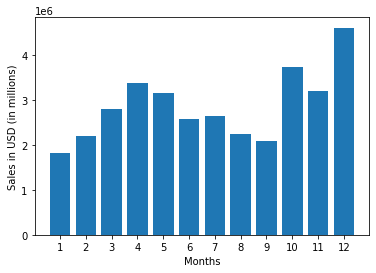

In [58]:
import matplotlib.pyplot as plt

plt.bar(salesdf.index,salesdf["Total Sales"])
plt.xticks(salesdf.index)
plt.xlabel("Months")
plt.ylabel("Sales in USD (in millions)")
plt.show()

In [59]:
import plotly.express as px
import plotly.graph_objects as go

px.bar(salesdf,x=salesdf.index, y='Total Sales')

### Q2 : What US city had the highes number of sales

In [29]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [30]:
# different mmethods for adding new column

# df["City"] = df["Purchase Address"].apply(lambda x : x.split(",")[1])
# df.head()

# or

# with this method we can do crazy things
# not very performance efficient

# def get_city(address):
#     return address.split(",")[1]

# df["City"] = df["Purchase Address"].apply(lambda x : get_address(x))
# df.head()

In [31]:
# new=df["Purchase Address"].str.split(",", expand=True)
# df["City"]=new[1]
# df.head()

In [32]:
# df["City"].unique()
# dfcity=df[["City","Total Sales"]].groupby("City").agg("sum")
# dfcity.sort_values(by=["Total Sales"],ascending=False)

In [33]:
# plt.bar(dfcity.index,dfcity["Total Sales"])
# plt.xticks(rotation=-45)
# plt.xlabel("Cities")
# plt.ylabel("Sales in USD (in millions)")
# plt.show()

In [34]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [35]:
def get_city(address):
    return address.split(",")[1]

def get_state(address):
    return address.split(" ")[-2]

df["City"] = df["Purchase Address"].apply(lambda x : get_city(x)+ " - "+get_state(x))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas - TX
1,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston - MA
2,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles - CA
3,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles - CA
4,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles - CA


In [37]:
df["City"].unique()

array([' Dallas - TX', ' Boston - MA', ' Los Angeles - CA',
       ' San Francisco - CA', ' Seattle - WA', ' Atlanta - GA',
       ' New York City - NY', ' Portland - OR', ' Austin - TX',
       ' Portland - ME'], dtype=object)

In [63]:
df_city=df[["City","Total Sales"]].groupby("City").sum()
df_city.sort_values(by=['Total Sales'],ascending=False)

,Total Sales
City,
San Francisco - CA,8262203.91
Los Angeles - CA,5452570.80
New York City - NY,4664317.43
Boston - MA,3661642.01
Atlanta - GA,2795498.58
Dallas - TX,2767975.40
Seattle - WA,2747755.48
Portland - OR,1870732.34
Austin - TX,1819581.75


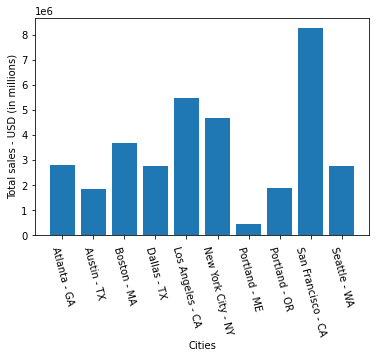

In [74]:
df_city.index
plt.bar(df_city.index,df_city["Total Sales"])
plt.xticks(rotation=-75)
plt.xlabel("Cities")
plt.ylabel("Total sales - USD (in millions)")
plt.show()

### Q3 : What time should we display advertisements to maximize the likelihood of customer's buying product

In [77]:
df.dtypes

Order ID            float64
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
Total Sales         float64
City                 object
dtype: object

In [79]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas - TX
1,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston - MA
2,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles - CA
3,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles - CA
4,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles - CA


In [81]:
df["Order Date"]=pd.to_datetime(df["Order Date"])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas - TX
1,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston - MA
2,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles - CA
3,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles - CA
4,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles - CA


In [83]:
df["Hour"] = df["Order Date"].dt.hour
df["Minute"] = df["Order Date"].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,Hour,Minute
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas - TX,8,46
1,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston - MA,22,30
2,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles - CA,14,38
3,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles - CA,14,38
4,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles - CA,9,27


In [90]:
df_hour = df.groupby("Hour").sum()
df_hour.sort_values(by=["Total Sales"], ascending=False)

,Order ID,Quantity Ordered,Price Each,Month,Total Sales,Minute
Hour,,,,,,
19,2.977595e+09,14470.0,2398588.31,91389,2412938.54,381042
12,2.904640e+09,14202.0,2299876.68,89161,2316821.34,368679
11,2.860187e+09,14005.0,2288855.18,87654,2300610.24,368952
20,2.817372e+09,13768.0,2268185.16,86375,2281716.24,354086
18,2.825965e+09,13802.0,2207696.93,86421,2219348.30,371688
13,2.796951e+09,13685.0,2139743.86,85808,2155389.80,351045
17,2.518340e+09,12229.0,2116777.02,77454,2129361.61,323428
14,2.534310e+09,12362.0,2072194.77,77836,2083672.73,322563
21,2.516707e+09,12244.0,2030763.83,77103,2042000.86,312062


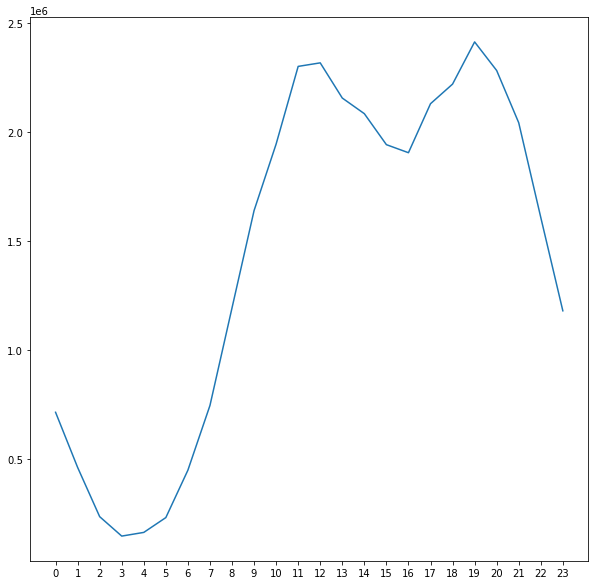

In [95]:
plt.figure(figsize=(10,10))

plt.plot(df_hour.index, df_hour["Total Sales"])
plt.xticks(df_hour.index)
plt.show()

### Q4: What products are often sold together?

In [106]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,Hour,Minute
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas - TX,8,46
1,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston - MA,22,30


In [119]:
multiple_df=df[df["Order ID"].duplicated(keep=False)]
multiple_df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,Hour,Minute
2,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles - CA,14,38
3,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles - CA,14,38
17,176574.0,Google Phone,1.0,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles - CA,19,42
18,176574.0,USB-C Charging Cable,1.0,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles - CA,19,42
29,176585.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston - MA,11,31
30,176585.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston - MA,11,31
31,176586.0,AAA Batteries (4-pack),2.0,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco - CA,17,0
32,176586.0,Google Phone,1.0,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco - CA,17,0
118,176672.0,Lightning Charging Cable,1.0,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City - NY,11,7
119,176672.0,USB-C Charging Cable,1.0,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,New York City - NY,11,7


In [121]:
multiple_df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x : ",".join(x))

multiple_df=multiple_df[["Order ID","Grouped"]].drop_duplicates()
multiple_df.head(10)

C:\Users\JASHWA~1\AppData\Local\Temp/ipykernel_2180/954285065.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Order ID,Grouped
2,176560.0,"Google Phone,Wired Headphones"
17,176574.0,"Google Phone,USB-C Charging Cable"
29,176585.0,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586.0,"AAA Batteries (4-pack),Google Phone"
118,176672.0,"Lightning Charging Cable,USB-C Charging Cable"
128,176681.0,"Apple Airpods Headphones,ThinkPad Laptop"
137,176689.0,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
188,176739.0,"34in Ultrawide Monitor,Google Phone"
224,176774.0,"Lightning Charging Cable,USB-C Charging Cable"
232,176781.0,"iPhone,Lightning Charging Cable"


In [125]:
# Referenced : https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

from itertools import combinations
from collections import Counter

count=Counter()

for row in multiple_df["Grouped"]:
    row_list=row.split(",")
    count.update(Counter(combinations(row_list,2)))
    
print(count.most_common(10))

[(('iPhone', 'Lightning Charging Cable'), 1005), (('Google Phone', 'USB-C Charging Cable'), 987), (('iPhone', 'Wired Headphones'), 447), (('Google Phone', 'Wired Headphones'), 414), (('Vareebadd Phone', 'USB-C Charging Cable'), 361), (('iPhone', 'Apple Airpods Headphones'), 360), (('Google Phone', 'Bose SoundSport Headphones'), 220), (('USB-C Charging Cable', 'Wired Headphones'), 160), (('Vareebadd Phone', 'Wired Headphones'), 143), (('Lightning Charging Cable', 'Wired Headphones'), 92)]


### Q5 : What Product Sold the most? Why do you think it sold the most?

In [126]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,Hour,Minute
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas - TX,8,46
1,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston - MA,22,30
2,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles - CA,14,38
3,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles - CA,14,38
4,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles - CA,9,27


In [127]:
sold_df=df[["Product","Quantity Ordered","Total Sales"]].groupby("Product").sum()
sold_df.head()

,Quantity Ordered,Total Sales
Product,,
20in Monitor,4129.0,454148.71
27in 4K Gaming Monitor,6244.0,2435097.56
27in FHD Monitor,7550.0,1132424.50
34in Ultrawide Monitor,6199.0,2355558.01
AA Batteries (4-pack),27635.0,106118.40


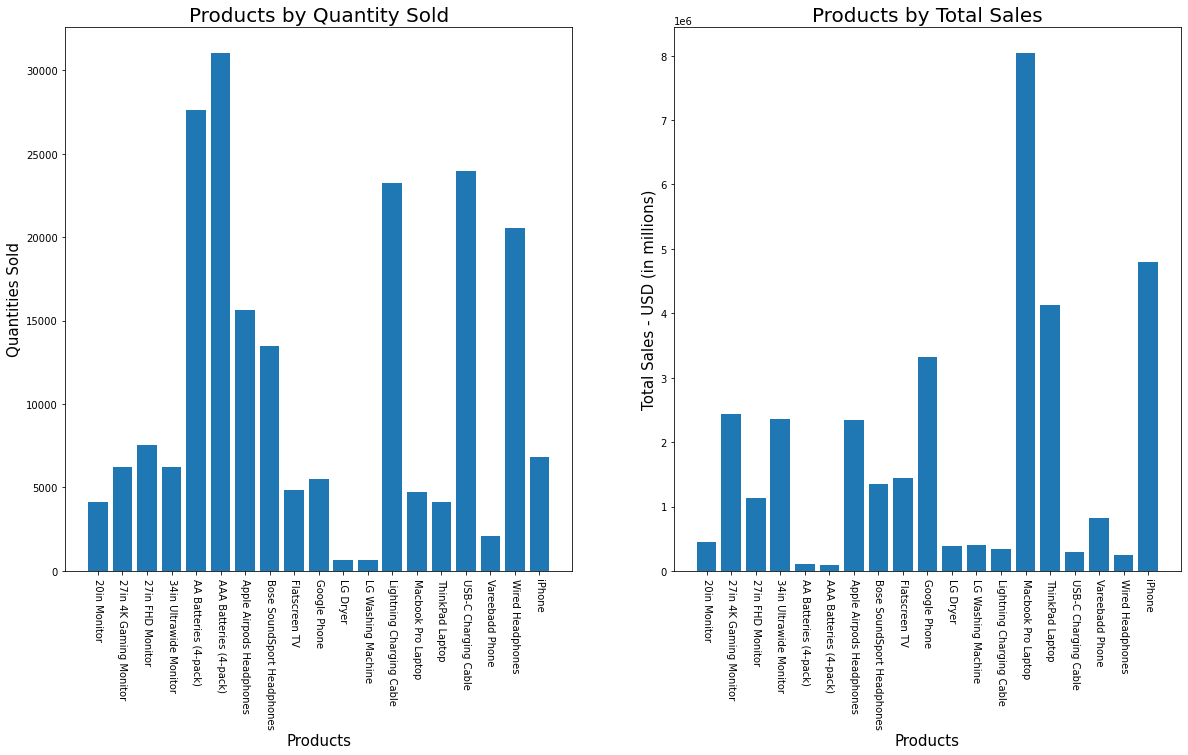

In [143]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.bar(sold_df.index,sold_df["Quantity Ordered"])
plt.xticks(rotation=270)
plt.title("Products by Quantity Sold",fontdict={'fontsize':20})
plt.xlabel("Products",fontdict={'fontsize':15})
plt.ylabel("Quantities Sold",fontdict={'fontsize':15})

plt.subplot(1,2,2)
plt.bar(sold_df.index,sold_df["Total Sales"])
plt.xticks(rotation=270)
plt.title("Products by Total Sales",fontdict={'fontsize':20})
plt.xlabel("Products",fontdict={'fontsize':15})
plt.ylabel("Total Sales - USD (in millions)",fontdict={'fontsize':15})

plt.show()

C:\Users\JASHWA~1\AppData\Local\Temp/ipykernel_2180/798821949.py:7: UserWarning:

FixedFormatter should only be used together with FixedLocator



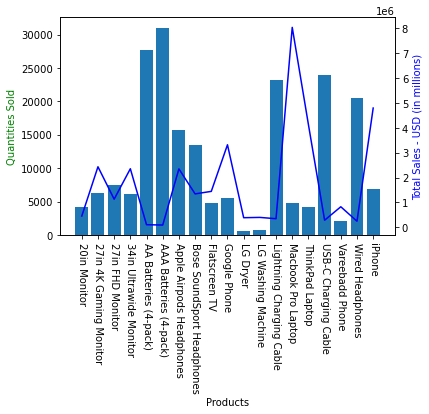

In [152]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(sold_df.index, sold_df["Quantity Ordered"])
ax2.plot(sold_df.index, sold_df["Total Sales"], "b-") # 'b-' is how the line is displayed

ax1.set_xlabel("Products")
ax1.set_xticklabels(sold_df.index, rotation=270)
ax1.set_ylabel("Quantities Sold",color="g")
ax2.set_ylabel("Total Sales - USD (in millions)", color="b")

plt.show()